In [438]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import os
%matplotlib inline

In [485]:
days = 1000
rollPeriod = 30
nbrStd = 2

## Generate Data

In [486]:
dates = pd.date_range(start='2018/01/01',periods=days)
df_dates = pd.Series(dates.strftime('%Y-%m-%d'))

In [487]:
dur = np.random.normal(250,5,days).astype(int)

In [488]:
out_data = pd.DataFrame({'Date':df_dates,'Duration':dur},columns=['Date','Duration'])
out_data.set_index('Date',inplace=True)

## Processing

In [489]:
out_data

,Duration
Date,
2018-01-01,249
2018-01-02,243
2018-01-03,248
2018-01-04,255
2018-01-05,249
2018-01-06,252
2018-01-07,256
2018-01-08,253
2018-01-09,250


In [490]:
#df['StartTime'] = pd.to_timedelta(df['StartTime'])
#df['EndTime'] = pd.to_timedelta(df['EndTime'])

In [491]:
out_data.dtypes

Duration    int32
dtype: object

In [492]:
out_data.to_csv('D://Users//vachekka//Desktop//dump.csv',sep=',',header=True)

## Control Chart Logic

In [493]:
input = out_data.copy(deep=True)

In [494]:
idx_dates = pd.DatetimeIndex(data=input.index,freq='D')

In [495]:
input.set_index(idx_dates,inplace=True)

In [496]:
input.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2020-09-17', '2020-09-18', '2020-09-19', '2020-09-20',
               '2020-09-21', '2020-09-22', '2020-09-23', '2020-09-24',
               '2020-09-25', '2020-09-26'],
              dtype='datetime64[ns]', name='Date', length=1000, freq='D')

In [497]:
input.head()

,Duration
Date,
2018-01-01,249
2018-01-02,243
2018-01-03,248
2018-01-04,255
2018-01-05,249


In [498]:
input['MeanX'] = input.Duration.rolling(rollPeriod).mean().shift(1)
input['StdDevX'] = input.Duration.rolling(rollPeriod).std(ddof=0).shift(1)
input['ThresholdHigh'] = input['MeanX'] + (input['StdDevX'] * nbrStd)
input['ThresholdLow'] = input['MeanX'] - (input['StdDevX'] * nbrStd)

In [499]:
input[0:60] 

,Duration,MeanX,StdDevX,ThresholdHigh,ThresholdLow
Date,,,,,
2018-01-01,249,NaN,NaN,NaN,NaN
2018-01-02,243,NaN,NaN,NaN,NaN
2018-01-03,248,NaN,NaN,NaN,NaN
2018-01-04,255,NaN,NaN,NaN,NaN
2018-01-05,249,NaN,NaN,NaN,NaN
2018-01-06,252,NaN,NaN,NaN,NaN
2018-01-07,256,NaN,NaN,NaN,NaN
2018-01-08,253,NaN,NaN,NaN,NaN
2018-01-09,250,NaN,NaN,NaN,NaN


In [500]:
#plt.scatter(input.index,input['Duration'])

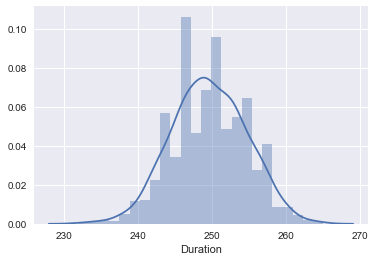

In [528]:
sns.distplot(input['Duration'])

In [502]:
#h = sorted(input['Duration'])
#plt.plot(h,stats.norm.pdf(h,np.mean(h),np.std(h)),'-o')

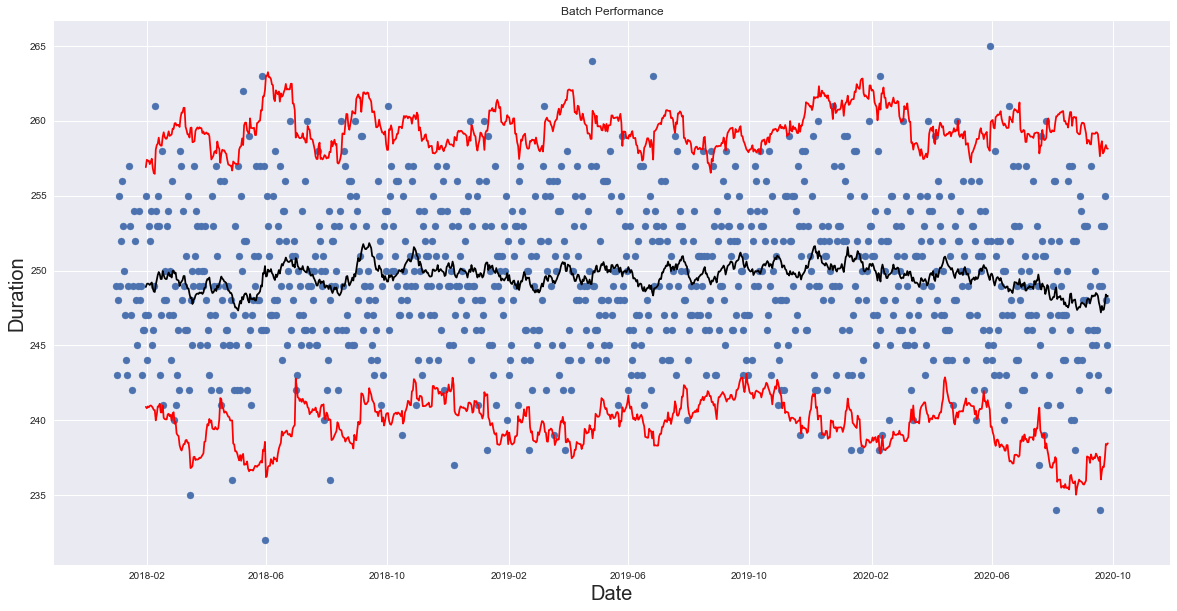

In [529]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(111)
ax1.set(title='Batch Performance',xlabel='Date',ylabel='Duration')
ax1.xaxis.label.set_size(20)
ax1.yaxis.label.set_size(20)
ax1.scatter(input.index,input['Duration'])
ax1.plot(input.index,input['MeanX'],color='k')
ax1.plot(input.index,input['ThresholdHigh'],color='r')
ax1.plot(input.index,input['ThresholdLow'],color='r')